# Analysis
---

### Research Questions:
* What is the relationship between gender and disciplines and how does this relationship change over time?
* Which Country has been awarded the most medals?







## RQ #1: The Proportion of Genders in the Olympics

---

In my EDA I brushed over the relationship between gender and sport discipline and how this relationship changes over time. In this analysis I will be doing a deeper dive into the proportions of men and women in the Olympics thoughout the years, concluding by looking into where we have reached in our most recent data from 2008.

Here we have the cleaned version of the data, I have removed a couple redundant variables to make it more concise. This is the dataframe that I will be transforming in order to further explore our data.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scripts.project_functions import rem_columns
from scripts.project_functions import country_medal
from scripts.project_functions import country_medal_year

In [35]:
df = pd.read_csv("../data/processed/data.csv")
data_rq2 = df
df = df.copy().drop(['Country_Code', 'City', 'Athlete', 'Event_gender', 'Unnamed: 0'], axis=1)
df.head()

,Year,Sport,Discipline,Event,Gender,Country,Medal
0,1976.0,Aquatics,Diving,3m springboard,Women,East Germany,Silver
1,1976.0,Aquatics,Diving,3m springboard,Men,Soviet Union,Bronze
2,1976.0,Aquatics,Diving,3m springboard,Men,United States,Gold
3,1976.0,Aquatics,Diving,3m springboard,Men,Italy,Silver
4,1976.0,Aquatics,Diving,10m platform,Women,United States,Bronze


In [36]:
df2 = df.groupby(["Year","Discipline"]).Gender.value_counts(normalize=True).mul(100).rename('Gender_pct').reset_index()

In [37]:
gender_pct = pd.crosstab(df['Discipline'],df['Gender']).apply(lambda x: (x/x.sum())*100, axis=1)
gender_pct = gender_pct.sort_values(by=['Men'], ascending=True)

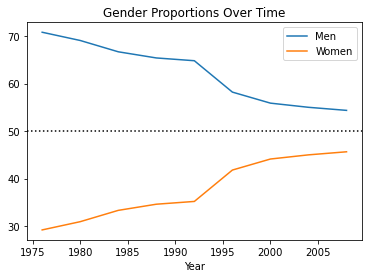

In [38]:
gender_proportions2 = sns.lineplot(data=pd.crosstab(df['Year'],df['Gender']).apply(lambda x: (x/x.sum())*100, axis=1))
gender_proportions2.lines[1].set_linestyle("-")
gender_proportions2.legend().get_lines()[1].set_linestyle("-")
gender_proportions2.set_title('Gender Proportions Over Time')
gender_proportions2.axhline(50, ls=':', color='black')

Here is a plot of how the gender proportions have changed over time. You can see that the proportion of men is falling towards the 50% mark, while the proportion of women climbs up. Clearly, over time we are reaching an equilibrium, this is expecially clear if you observe around 2008, where the proportion is around 47% women. We are approaching an even split between the two. This chart shows valuable information, however, simply observing proportions could lead to a false understanding of the data. This chart could indicate a growth in female participation, but it could equally represent a fall in male participation. We are unable to assume from this graph that the number of women participants has increased, we must use the count of female and male athletes over time to draw any conclusions.

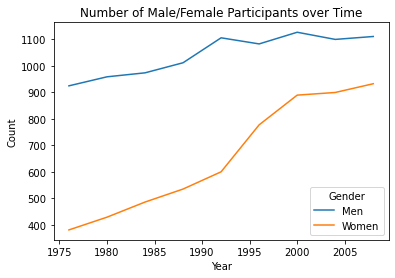

In [39]:
gender_count = sns.lineplot(data=df.groupby(["Year", "Gender"])["Gender"].count().reset_index(name="Count"), x='Year', y='Count', hue='Gender')
gender_count.set_title('Number of Male/Female Participants over Time')
plt.savefig('gender_count.png', dpi=300)

This graph is similar to the other plot in that it shows how the gender balance has changed over time. However, this graph shows a count of male and female participants instead of a proportion. This gives another perspective on the situation, showing the growth of each gender instead of showing their growth in relation to one another. This graph displays a growth in both female and male participation, with the count of female athletes having a more significant change. This explains the change in proportions we observed in the previous graph. Let us now look at each individual discipline and how their gender proportions have changed over time.

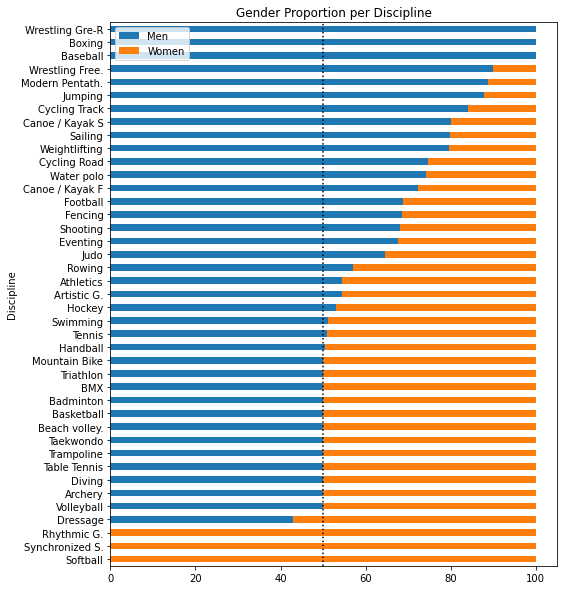

In [40]:
gender_proportions = gender_pct.plot(kind='barh', stacked='True', figsize=(8, 10), title='Gender Proportion per Discipline')
gender_proportions.axvline(50, ls=':', color='black')
plt.legend(loc="upper left")

This stacked barchart displays the proportions of men and women in each discipline, with a divider in the middle indicating the 50% mark. One of the main facts that is pulled from this visualization is that a majority of disciplines in the Olympics tend to lean towards having more male participants than female ones. However, there is also a significant group of disciplines with an equal split between genders. It is worth noting that this a cumulative representation of the data from 1976 to 2008, and not a representation of the current balance of men and women. We must dive into how this proportion has changed over time to have a better understanding of the progression of this data.

In [41]:
genders2 = gender_pct.reset_index()
data2= df2[df2['Discipline'].isin(list(genders2.Discipline[10:30]))] ##taking the 20 middle disciplines from gender_proportions chart
data2 = data2[data2.Gender != 'Men'] ##dropping 'Men' to focus on data relating to 'Women'

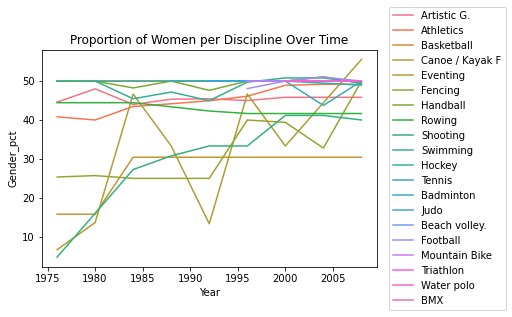

In [42]:
wmn_proportions = sns.lineplot(x='Year', y='Gender_pct', hue = 'Discipline', data=data2, ci=None)
wmn_proportions.set_title('Proportion of Women per Discipline Over Time')
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.savefig('wmn_proportions.png', dpi=300)

This last graph shows the how the proportion of women in each sport has changed over time. I decided to use the middle 20 disciplines from the Gender Proportions per Discipline chart because I felt that the disciplines closer to a 50% ratio would have the most interesting growth pattern in that they were less likely to be stagnant than the extremes (like wresling or synchronized swimming. You can see that for almost every discipline there is a steady growth towards the 50% mark. Some disciplines have more change than others, but it is clear that there is an overall shift towards equality over time.

In [43]:
df2 = df2[df2.Year == 2008].drop(['Year'], axis = 1)

In [44]:
df2 = pd.crosstab(df2['Discipline'],df2['Gender']).apply(lambda x: (x/x.sum())*100, axis=1)
df2 = df2.sort_values(by=['Men'], ascending=True)

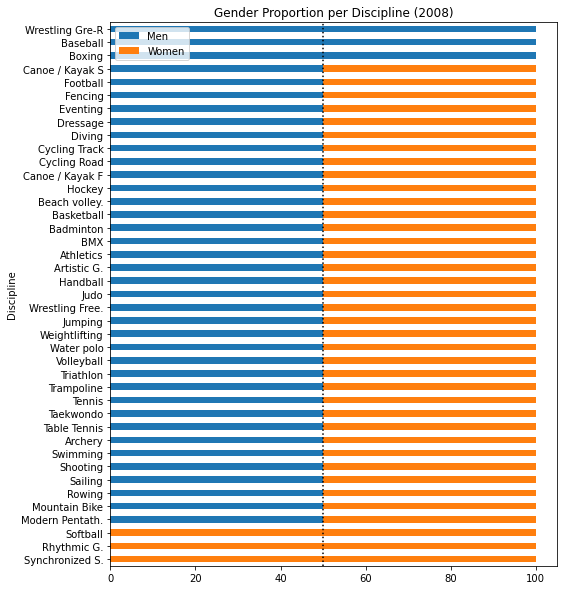

In [45]:
gender_proportions_2008 = df2.plot(kind='barh', stacked='True', figsize=(8, 10), title='Gender Proportion per Discipline (2008)')
gender_proportions_2008.axvline(50, ls=':', color='black')
plt.legend(loc="upper left")

Finally, here we have the gender proportions chart from 2008. In this chart it is clear to see that we have reached an equilibrium between the two genders for almost all disciplines. For each gender, there are three disciplines that exclusive to their gender. Looking back at the Gender Proportions per Discipline chart, it appears that these sports have been exclusive to each gender ever since they were originally introduced. You may be questioning why there was slight disproportion in 2008 shown in the first Gender Proportions Over Time graph. This can be explained by the difference between the count of male athletes that participated in their gender-exclusive disciplines compared to the count of women that competed in their exclusive sports. This is likely simply due to the number of events that are offered for each discipline. Without including the six gender-exclusive disciplines, a perfect equality has been reached.

### Conclusion

We can conclude from all of the above visualizations that there certainly was a gender imbalance in the beginning years of the Olympics. However, as time has passed the ratio between male and female participants in the Olympics has leveled out to a near equilibrium.


## RQ #2: Which Country has been awarded the most medals?

During the exploration of my EDA, I was able to see that despite the United States having the most medals earned. They managed to accumulate the majority of their medals earned in the 80's-90's. Before delving into further research, I will make a better visualization to verify when they earned most of their medals.

In [50]:
data_rem = rem_columns(data_rq2)

,Unnamed: 0,City,Year,Sport,Country,Medal
0,0,Montreal,1976.0,Aquatics,East Germany,Silver
1,1,Montreal,1976.0,Aquatics,Soviet Union,Bronze
2,2,Montreal,1976.0,Aquatics,United States,Gold
3,3,Montreal,1976.0,Aquatics,Italy,Silver
4,4,Montreal,1976.0,Aquatics,United States,Bronze
...,...,...,...,...,...,...
15311,15311,Beijing,2008.0,Wrestling,France,Bronze
15312,15312,Beijing,2008.0,Wrestling,Georgia,Gold
15313,15313,Beijing,2008.0,Wrestling,Azerbaijan,Silver
15314,15314,Beijing,2008.0,Wrestling,France,Gold


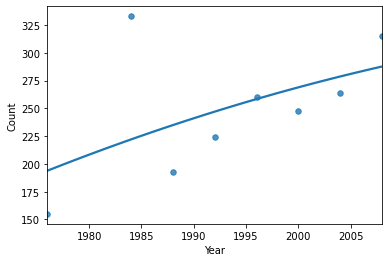

In [53]:
total_final = country_medal_year(data_rem)

us_only = total_final.query("Country == 'United States'")
us_time = sns.regplot(data = us_only,  x = "Year", y = "Count",scatter_kws={"s": 30}, order=2, ci=None)

The scatter plot allowed us to better visually see the trend in medals earned. Another research question can be formulated from this, one can ask "Which sports has earned the U.S most of their medals?".

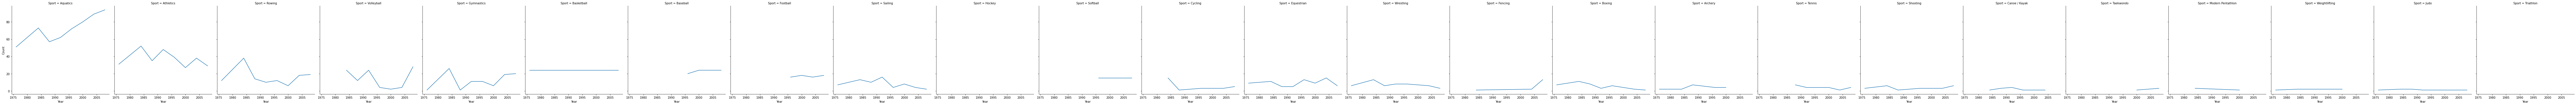

In [122]:
total_medals = us_only.groupby(["Sport","Year"])["Medal"].count().reset_index(name="Count").sort_values(by='Count',ascending=False).reset_index()

all_sports = sns.relplot(data=total_medals, kind="line",x="Year", y="Count", col="Sport")

Using a relational plot, we are able to see the amount of medals earned in each sport. Each sport has their own graph due to the fact that there are too many sports and it wouldnt fit on a single graph. Scrolling through the different plots, we are able to see that Aquatics is the top medal earner from 1975-2008. Athletics is the second medal winning sport, closely followed by Rowing. A solid assumption that the United States excel in water related sports could be made.

### Conclusion

It can be concludeded from the above visualizations that the U.S was certainly the top medal winning country of all time. Not only that but their top three medal winning sports are Aquatics, Athletics and Rowing. This has helped us gain insight into what sports the United States specialize in and do well in. 